# **Projeto: Previsão de Preços de Imóveis Utilizando Machine Learning**

O mercado imobiliário é um dos setores que mais se beneficia da análise de dados e de modelos preditivos. Estimar com precisão o valor de um imóvel ajuda compradores, vendedores e investidores a tomar decisões mais informadas. Neste projeto, utilizamos técnicas de machine learning para desenvolver modelos capazes de prever o preço de um imóvel com base em características como área construída, número de quartos, localização e outros fatores.

---

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

y = train['SalePrice']
train_features = train.drop('SalePrice', axis=1)

train_encoded = pd.get_dummies(train_features, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

train_aligned, test_aligned = train_encoded.align(test_encoded, join='inner', axis=1)

X = train_aligned

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

model = LinearRegression()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_val_imputed)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f'Regressão Linear: RMSE = {rmse:.2f}, R² = {r2:.2f}')


Regressão Linear: RMSE = 34680.71, R² = 0.84


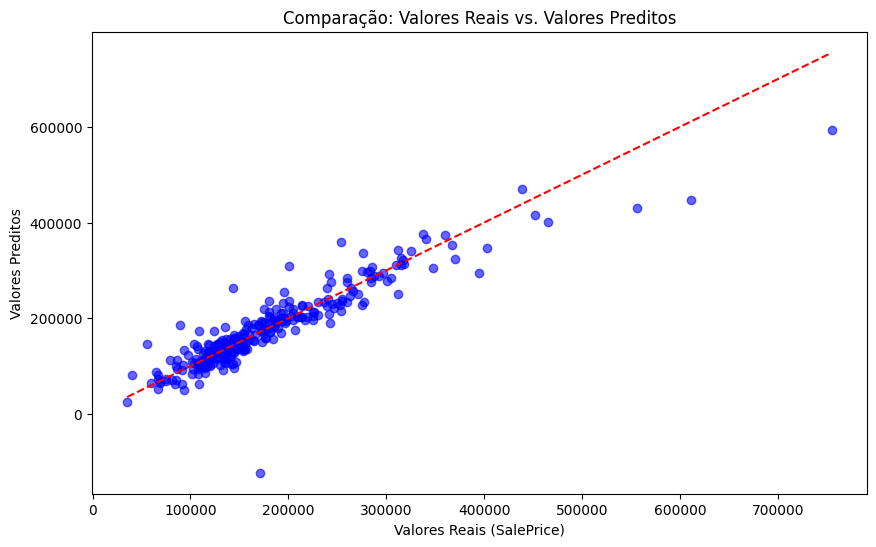

In [26]:
import matplotlib.pyplot as plt

# Gráfico de dispersão: Valores Reais vs. Valores Preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='b')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Linha de referência
plt.xlabel('Valores Reais (SalePrice)')
plt.ylabel('Valores Preditos')
plt.title('Comparação: Valores Reais vs. Valores Preditos')
plt.show()


---

In [27]:
test_imputed = imputer.transform(test_aligned)

test_predictions = model.predict(test_imputed)

sample_sub = pd.read_csv('/content/sample_data/sample_submission.csv')

submission = sample_sub[['Id']].merge(
    pd.DataFrame({'Id': test['Id'], 'SalePrice': test_predictions}),
    on='Id', how='left'
)

submission.to_csv('submission.csv', index=False)

# Projeto: Previsão de Preços de Imóveis

## 1. Introdução
Este projeto tem como objetivo prever os preços de imóveis (SalePrice) com base em diversas características fornecidas em um dataset do Kaggle. A motivação é ajudar compradores, vendedores e investidores a estimar o valor de propriedades de maneira mais objetiva e baseada em dados.

---

## 2. Coleta de Dados
- **Fonte**: [House Prices - Advanced Regression Techniques (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- **Arquivos**:
  - `train.csv`: Conjunto de treino com as variáveis explicativas e a variável alvo `SalePrice`.
  - `test.csv`: Conjunto de teste com as variáveis explicativas (sem `SalePrice`).
  - `sample_submission.csv`: Arquivo para padronizar o envio de previsões, contendo `Id` e `SalePrice` (inicialmente vazio).

---

## 3. Modelagem

### 3.1. Pré-processamento
1. **Separação do Target**: A coluna `SalePrice` é separada do `train.csv`.
2. **One-Hot Encoding**: Conversão de variáveis categóricas para variáveis dummies (0/1).
3. **Alinhamento**: Uso do `align` para garantir que `train` e `test` tenham as mesmas colunas após a codificação.
4. **Tratamento de Valores Ausentes**: Uso de `SimpleImputer` (mediana) para preencher `NaN`.

### 3.2. Treinamento do Modelo
- **Modelo**: Regressão Linear (LinearRegression).
- **Biblioteca**: `scikit-learn`.
- **Divisão de Dados**: `train_test_split` com 80% para treino e 20% para validação.

### 3.3. Avaliação
- **Métricas**:  
  - **RMSE (Root Mean Squared Error)**  
  - **R² (Coeficiente de Determinação)**
- **Resultado** (exemplo):  
  - RMSE = 34680.71  
  - R² = 0.84  

---

## 4. Visualização dos Resultados

Para verificar a qualidade das previsões, geramos um gráfico de dispersão comparando os valores reais de `SalePrice` e os valores preditos:

![Exemplo de Gráfico]
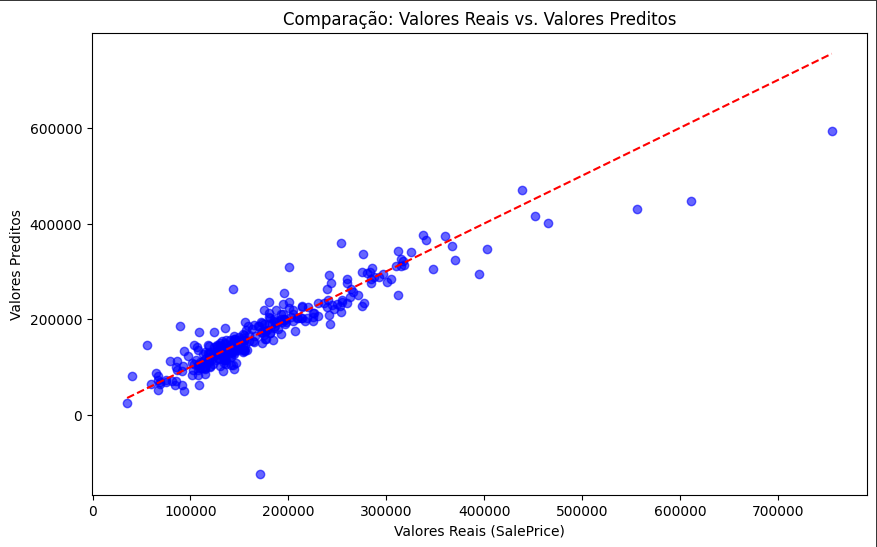

Observamos que a maior parte dos pontos se aproxima da linha vermelha (que representa `valor real = valor predito`), indicando que o modelo de Regressão Linear está captando bem a relação entre as variáveis.

---

## 5. Conclusões

- **Desempenho**: Com R² = 0.84, o modelo explica boa parte da variação no preço dos imóveis.
- **Limitações**:  
  - Possibilidade de outliers ou variáveis não capturadas que influenciam o preço.
  - Modelos mais complexos (como Gradient Boosting, Random Forest) podem melhorar o desempenho.
- **Próximos Passos**:  
  - Ajuste de hiperparâmetros e validação cruzada.  
  - Engenharia de atributos (feature engineering).  
  - Comparar diferentes algoritmos.

---

## 6. Referências

- [Scikit-learn Documentation](https://scikit-learn.org/)
- [Pandas Documentation](https://pandas.pydata.org/)
- [Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
